In [1]:
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

--2025-01-17 08:40:01--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22322605 (21M) [text/plain]
Saving to: 'Compiled_Reviews.txt.15'

     0K .......... .......... .......... .......... ..........  0% 3.21M 7s
    50K .......... .......... .......... .......... ..........  0% 9.97M 4s
   100K .......... .......... .......... .......... ..........  0% 5.85M 4s
   150K .......... .......... .......... .......... ..........  0% 15.9M 3s
   200K .......... .......... .......... .......... ..........  1% 13.4M 3s
   250K .......... .......... .......... .......... ..........  1% 37.0M 3s
   300K .......... .......... .......... .......... ..........  1%

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Create lists
reviews=[]
labels=[]

with open("Compiled_Reviews.txt", encoding= "utf-8") as f:
   # iterate over the lines in the file
   for line in f.readlines()[1:]:
        # split the current line into a list of two element - the review and the label
        fields = line.rstrip().split('\t')
        # put the current review in the reviews list
        reviews.append(fields[0])
        # put the current sentiment rating in the labels list
        labels.append(fields[1])



In [4]:
from collections import Counter
import re
# Tokenise the text, turning a list of strings into a list of lists of tokens. We use very naive space-based tokenisation.
tokenized_sents = [re.findall("[^ ]+",txt) for txt in reviews]
# Collapse all tokens into a single list
tokens=[]
for s in tokenized_sents:
      tokens.extend(s)
# Count the tokens in the tokens list. The returns a list of tuples of each token and count
counts=Counter(tokens)
# Sort the tuples. The reverse argument instructs to put most frequent first rather than last (which is the default)
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
# Extract the list of tokens, by transposing the list of lists so that there is a list of tokens a list of counts and then just selecting the former
so=list(zip(*so))[0]
# Select the first 5000 words in the list
#so = [i not in asdasd.csv for i in so]

stop_words = []
with open('NLTK_stopwords.txt', encoding= "utf-8") as f:
     for line in f.readlines()[1:]:
        # split the current line into a list of two element - the review and the label
        fields = line.rstrip()
      
        stop_words.append(fields)
        
     """ for line in f:
        fields = line.rstrip().split('\t')
        # put the current review in the reviews list
        stop_words.append(fields)
        stop_words.append(line.strip())
        # put the current sentiment rating in the labels list """
token_clean = [token for token in so if token not in stop_words]

type_list=token_clean[0:5000]

In [5]:
token_def = re.compile("[^ ]+")

In [6]:
# Create a 36547 x 5000 matrix of zeros
M = np.zeros((len(reviews), len(type_list)))
#iterate over the reviews
for i, rev in enumerate(reviews):
    # Tokenise the current review:
    tokens = token_def.findall(rev)
    # iterate over the words in our type list (the set of 5000 words):
    for j,t in enumerate(type_list):
        # if the current word j occurs in the current review i then set the matrix element at i,j to be one. Otherwise leave as zero.
        if t in tokens:
              M[i,j] = 1



In [7]:
#Split the dataset into training and testing set
train_ints=np.random.choice(len(reviews),int(len(reviews)*0.8),replace=False)
test_ints=list(set(range(0,len(reviews))) - set(train_ints))

In [8]:
M_train = M[train_ints,]
M_test = M[test_ints,]
labels_train = [labels[i] for i in train_ints]
labels_test = [labels[i] for i in test_ints]

Text(0, 0.5, 'loss')

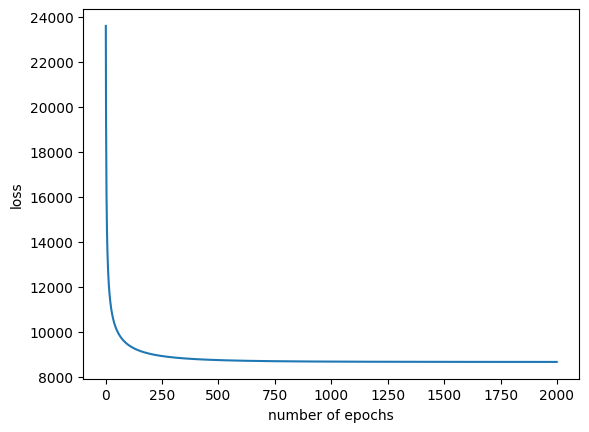

In [9]:
#Logistic Regression Classifier
import math

num_features=5000  # vocab
y=[int(l == "positive") for l in labels_train]  #true label list containing 1 or 0
weights = np.random.rand(num_features) #random 5000 weights
bias=np.random.rand(1) #random
n_iters = 2000 #how many times through the same text
lr=0.01
logistic_loss=[]
num_samples=len(y)
for i in range(n_iters): 
  layer_1_error = 0
  for i in range(len(y)):
        z = M_train[i].dot(weights)+bias
        q = 1/(1+np.exp(-z))
        eps=0.00001   # constant added so that q and 1-q is never zero
        loss = -sum((y[i]*np.log2(q+eps) + (1 - y[i]) * np.log2(1-q + eps)))
        layer_1_error += loss
        y_pred=[int(ql > 0.5) for ql in q]
        #backward pass
        dw = (q-y[i]) * M_train[i]
        db = (q-y[i]) 
        weights = weights - lr*dw
        bias = bias - lr*db 
  logistic_loss.append(layer_1_error)
plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")
#loss = sum(-(np.ones(len(y))*np.log2(q)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q)))

In [10]:
#Using Test Dataset
z = M_test.dot(weights)+bias
q = 1/(1+np.exp(-z))
y_test_pred=[int(ql > 0.5) for ql in q]

In [11]:
#Calculating Accuracy of Test Data
y_test=[int(l == "positive") for l in labels_test]
acc_test=[int(yp == y_test[s]) for s,yp in enumerate(y_test_pred)]
acc = sum(acc_test)/len(acc_test)
print("Accuracy: " + str(acc))


Accuracy: 0.8131326949384405


In [15]:
#Calculate Precision and recall and F1for training data
z = M_train.dot(weights)+bias
q = 1/(1+np.exp(-z))
y_train_pred=[int(ql > 0.5) for ql in q]
labels_train_pred=["positive" if s == 1 else "negative" for s in y_train_pred]

true_positives=sum([int(yp == "positive" and labels_train[s] == "positive") for s,yp in enumerate(labels_train_pred)])
false_positives=sum([int(yp == "positive" and labels_train[s] == "negative") for s,yp in enumerate(labels_train_pred)])
false_negatives=sum([int(yp == "negative" and labels_train[s] == "positive") for s,yp in enumerate(labels_train_pred)])
precision=true_positives/(true_positives+false_positives)
recall=true_positives/(true_positives+false_negatives)
f1 = (2* precision * recall) / (precision + recall)
print(precision)
print(recall)
print(f1)



0.9314922365769823
0.9345938875014865
0.9330404843879851


In [14]:
#Calculate Precision and recall and F1 for test data
z = M_test.dot(weights)+bias
q = 1/(1+np.exp(-z))
y_test_pred=[int(ql > 0.5) for ql in q]
labels_test_pred=["positive" if s == 1 else "negative" for s in y_test_pred]

true_positives=sum([int(yp == "positive" and labels_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])
false_positives=sum([int(yp == "positive" and labels_test[s] == "negative") for s,yp in enumerate(labels_test_pred)])
false_negatives=sum([int(yp == "negative" and labels_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])
precision=true_positives/(true_positives+false_positives)
recall=true_positives/(true_positives+false_negatives)
f1 = (2* precision * recall) / (precision + recall)
print(precision)
print(recall)
print(f1)


0.8350961538461539
0.8363023591718826
0.8356988212653356


In [21]:
#Extract top 20 words from each sentiment
[type_list[x] for x in np.argsort(weights)[0:40]]

['disappointment.',
 'lame',
 'defect',
 'mediocre',
 'boring,',
 'alien',
 'worthless',
 'cumbersome',
 'TWO',
 'garbage.',
 'blurry',
 'monsters',
 'poorly',
 'least.',
 'hopes',
 'attempting',
 'terrible.',
 'it?',
 'broke.',
 'poor.',
 'hero',
 'returning',
 'boring.',
 'cart',
 'unhappy',
 'slow,',
 'back"',
 'involving',
 'McAfee',
 'useless.',
 'tracks,',
 'Richard',
 'Unless',
 'all!',
 'reports',
 'dissapointed',
 'largely',
 'situations',
 'respond',
 'ruined']

In [17]:
[type_list[x] for x in np.argsort(weights)[::-1][0:20]]

['refreshing',
 'weekly',
 'favorites',
 'Excellent',
 'too"',
 'Season',
 'obtain',
 'finest',
 'awesome.',
 'weapon',
 'PS2',
 'aroma',
 'blast',
 'debut',
 'Highly',
 'sheer',
 'find.',
 'progress',
 'delicious',
 'GTA']